In [2]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 5.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.ensemble import  GradientBoostingClassifier


from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LogisticRegression
from collections import Counter

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.metrics import silhouette_samples, silhouette_score

from yellowbrick.cluster import SilhouetteVisualizer

In [52]:
data = pd.read_csv('..Datasets/Social_Network_Ads.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [53]:
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


0.5395872953166894

In [123]:
# 1. Aplicar el modelo de clúster mediante el método de k-means haciendo uso adecuado de las variables y
#    presentar una función en la que se muestre una gráfica los anchos de silueta para 2, 3, 4, 5 y 6 segmentos.
#    Presentar sus conclusiones. (2 puntos)

x = data.iloc[:,[2, 3]].values
y = data.iloc[:,-1].values

data_X_scale = pd.DataFrame(StandardScaler().fit_transform(x))

# 2 Segmentos
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit_predict(x)
silhouette_2 = silhouette_score(x, kmeans_2.labels_)
silhouette_2

0.5395872953166894

In [124]:
# 3 Segmentos
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit_predict(x)
silhouette_3 = silhouette_score(x, kmeans_3.labels_)
silhouette_3

0.6021707228326366

In [125]:
# 4 Segmentos
kmeans_4 = KMeans(n_clusters=4)
kmeans_4.fit_predict(x)
silhouette_4 = silhouette_score(x, kmeans_4.labels_)
silhouette_4

0.6065989841357814

In [105]:
# 5 Segmentos
kmeans_5 = KMeans(n_clusters=5)
kmeans_5.fit_predict(x)
silhouette_5 = silhouette_score(x, kmeans_5.labels_)
silhouette_5

0.6102051324759187

In [106]:
# 6 Segmentos
kmeans_6 = KMeans(n_clusters=6)
kmeans_6.fit_predict(x)
silhouette_6 = silhouette_score(x, kmeans_6.labels_)
silhouette_6

0.5602333463727386

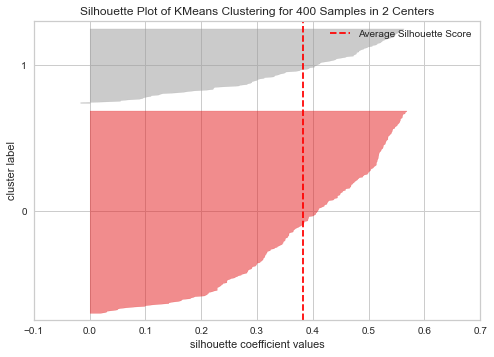

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 400 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [142]:
# 2 Segmentos
model = SilhouetteVisualizer(kmeans_2.fit(data_X_scale))
model.fit(data_X_scale)
model.show()

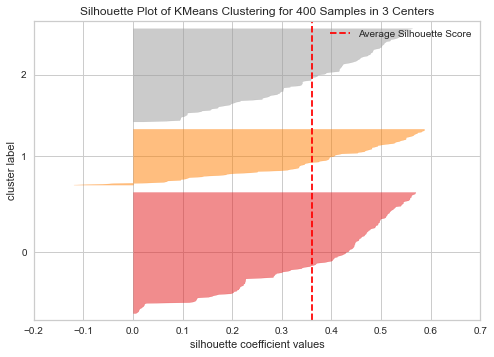

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 400 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [143]:
# 3 Segmentos
model = SilhouetteVisualizer(kmeans_3.fit(data_X_scale))
model.fit(data_X_scale)
model.show()

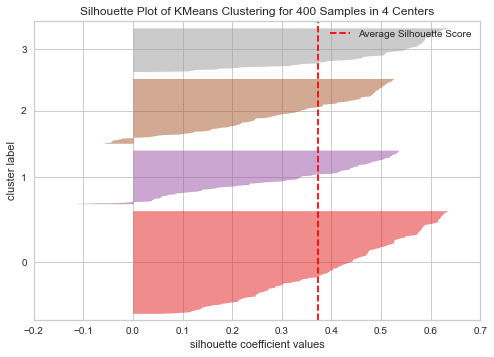

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 400 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [144]:
# 4 Segmentos
model = SilhouetteVisualizer(kmeans_4.fit(data_X_scale))
model.fit(data_X_scale)
model.show()

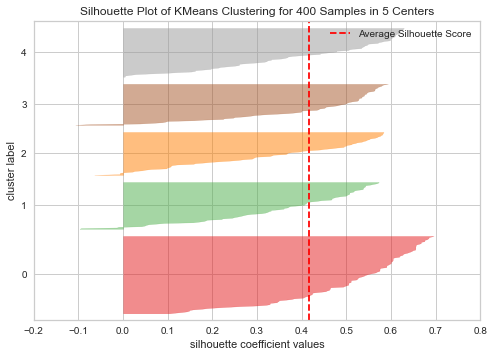

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 400 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [145]:
# 5 Segmentos
model = SilhouetteVisualizer(kmeans_5.fit(data_X_scale))
model.fit(data_X_scale)
model.show()

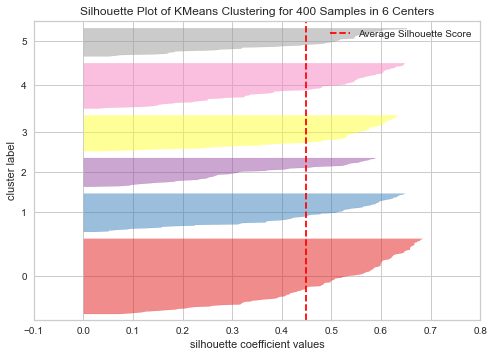

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 400 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [146]:
# 6 Segmentos
model = SilhouetteVisualizer(kmeans_6.fit(data_X_scale))
model.fit(data_X_scale)
model.show()

In [64]:
# CONCLUCIONES

# Como se puede observar el mejor ancho de silueta se obtiene utilizando 5 clusters, con un resultado de aproximadamente 0.61.
# Adicionalmente, el resto de segmentos es viable debido a que no se aproxima mucho a 0 por lo que asumimos que
# los agrupamientos no se sobreponen

In [65]:
# 2. Haciendo uso de los modelos de SVM, Random Forest y Boosting, presentar un análisis comparativo usando
#    las matrices de clasificación y AUC. Presentar sus conclusiones. (4 puntos)


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# SVN
param_grid = {'C': [0.1,1,10,100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ..................... C=1, gamma=0.001, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [66]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.01)


In [88]:
classifier_SVN = SVC(kernel='rbf',C = 10,gamma = 0.01,probability=True).fit(X_train, y_train)
y_pred_SVN = classifier_SVN.predict(X_test)
confusion_matrix(y_test, y_pred_SVN)

array([[53,  5],
       [ 9, 13]], dtype=int64)

Confusion matrix, without normalization
[[53  5]
 [ 9 13]]
Normalized confusion matrix
[[0.9137931  0.0862069 ]
 [0.40909091 0.59090909]]


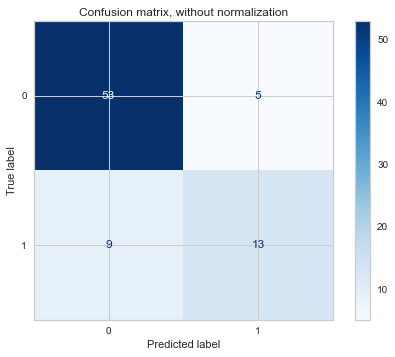

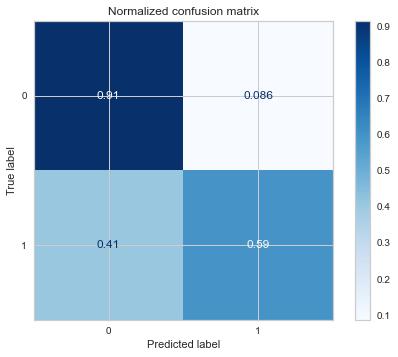

In [72]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier_SVN, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [73]:
y_pred_prob_SVN = classifier_SVN.predict_proba(X_test)
false_positive_rate_SVN, true_positive_rate_SVN, thresholds = roc_curve(y_test, y_pred_prob_SVN[:,1])
roc_auc_SVN = auc(false_positive_rate_SVN, true_positive_rate_SVN)
roc_auc_SVN

0.7993730407523513

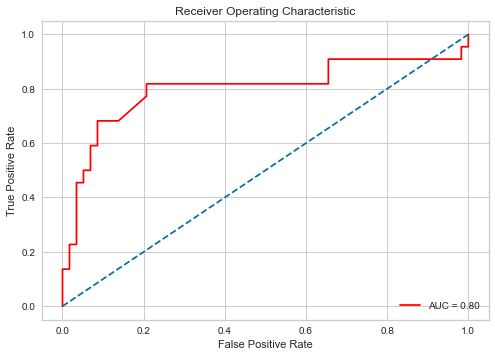

In [74]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_SVN,true_positive_rate_SVN, color='red',label = 'AUC = %0.2f' % roc_auc_SVN)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
# Random Forest

cv_scores_RF = cross_val_score(RandomForestClassifier(),X_train,y_train,cv=5)
param_grid_RF = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid = GridSearchCV(RandomForestClassifier(),param_grid_RF,refit=True,verbose=2,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.7s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.7s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.7s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=3, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] . max_depth=4, max_features=auto, n_estimators=700, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=log2, n_estimators=700 ................
[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=5, max_features=log2, n_estimators=700 ................
[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] .

[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] .

[CV] . max_depth=9, max_features=log2, n_estimators=200, total=   0.2s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   0.7s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=2)

In [76]:
print(grid.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=200)


Confusion matrix, without normalization
[[55  3]
 [ 1 21]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.04545455 0.95454545]]


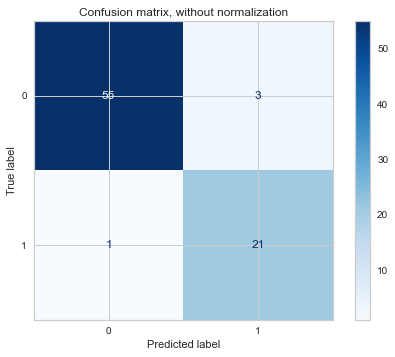

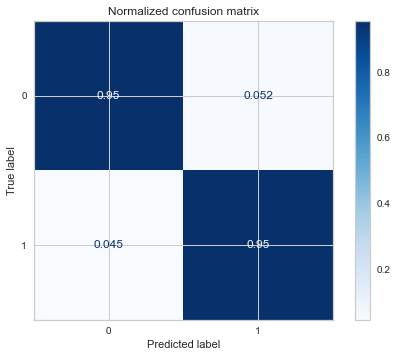

In [78]:
classifier_RF = RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=200).fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)
confusion_matrix(y_test, y_pred_RF)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier_RF, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [79]:
y_pred_prob_RF = classifier_RF.predict_proba(X_test)
false_positive_rate_RF, true_positive_rate_RF, thresholds_RF = roc_curve(y_test, y_pred_prob_RF[:,1])
roc_auc_RF = auc(false_positive_rate_RF, true_positive_rate_RF)
roc_auc_RF

0.9835423197492164

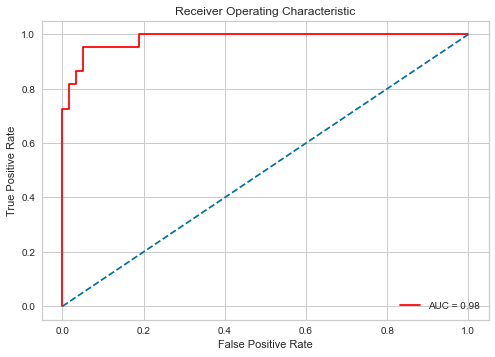

In [80]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_RF,true_positive_rate_RF, color='red',label = 'AUC = %0.2f' % roc_auc_RF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
# BOOSTING

cv_scores_BOO = cross_val_score(GradientBoostingClassifier(),X_train,y_train,cv=5)
param_grid_BOO = {
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_BOO = GridSearchCV(GradientBoostingClassifier(),param_grid_BOO,refit=True,verbose=2,cv=5)
grid_BOO.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=200 ................
[CV] . max_depth=2, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.2s
[CV] max_depth=2, max_features=auto, n_estimators=700 ................
[CV] . max_depth=2, max_features=auto, n_estimators=700, total=   0.2s
[CV] max_depth=2, max_features=sqrt, n_estimators=200 ................
[CV] .

[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=4, max_features=auto, n_estimators=200 ................
[CV] . max_depth=4, max_features=auto, n_estimators=200, total=   0.1s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] . max_depth=4, max_features=auto, n_estimators=700, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] . max_depth=4, max_features=auto, n_estimators=700, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] . max_depth=4, max_features=auto, n_estimators=700, total=   0.4s
[CV] max_depth=4, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=5, max_features=log2, n_estimators=700, total=   0.5s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=200 ................
[CV] . max_depth=6, max_features=auto, n_estimators=200, total=   0.2s
[CV] max_depth=6, max_features=auto, n_estimators=700 ................
[CV] . max_depth=6, max_features=auto, n_estimators=700, total=   0.7s
[CV] max_depth=6, max_features=auto, n_estimators=700 ................
[CV] .

[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.8s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.8s
[CV] max_depth=7, max_features=log2, n_estimators=700 ................
[CV] . max_depth=7, max_features=log2, n_estimators=700, total=   0.8s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] . max_depth=8, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=8, max_features=auto, n_estimators=200 ................
[CV] .

[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.7s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   0.9s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.0s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   0.9s
[CV] max_depth=9, max_features=log2, n_estimators=700 ................
[CV] . max_depth=9, max_features=log2, n_estimators=700, total=   1.0s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  max_depth=10, max_features=auto, n_estimators=200, total=   0.3s
[CV] max_depth=10, max_features=auto, n_estimators=200 ...............
[CV]  

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  2.0min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             verbose=2)

In [83]:
print(grid_BOO.best_estimator_)

GradientBoostingClassifier(max_depth=2, max_features='auto', n_estimators=200)


Confusion matrix, without normalization
[[55  3]
 [ 3 19]]
Normalized confusion matrix
[[0.94827586 0.05172414]
 [0.13636364 0.86363636]]


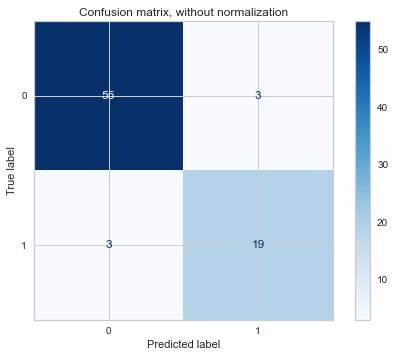

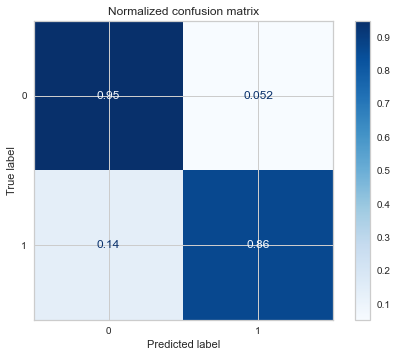

In [84]:
classifier_BOO = GradientBoostingClassifier(max_depth=2, max_features='auto', n_estimators=200).fit(X_train, y_train)
y_pred_BOO = classifier_BOO.predict(X_test)
confusion_matrix(y_test, y_pred_BOO)

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier_BOO, X_test, y_test,
                                 #display_labels=y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [85]:
y_pred_prob_BOO = classifier_BOO.predict_proba(X_test)
false_positive_rate_BOO, true_positive_rate_BOO, thresholds_BOO = roc_curve(y_test, y_pred_prob_BOO[:,1])
roc_auc_BOO = auc(false_positive_rate_BOO, true_positive_rate_BOO)
roc_auc_BOO

0.9745297805642633

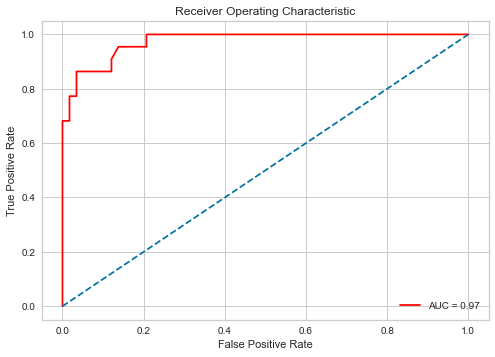

In [86]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_BOO,true_positive_rate_BOO, color='red',label = 'AUC = %0.2f' % roc_auc_BOO)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
# Concluciones

# Luego de analizar los resultados de los tres modelos podemos observar que utilizar Random Forest resulta ser el mejor en
# este caso. Tanto Boosting como Random forest obtienen un resultado optimo por lo que ambos son viables para el uso.
# Adicionalmente, el modelo de SVN obtiene un resultado muy bajo en comparación a los otros, esto puede deberse a que
# solo se analizó un kernel.

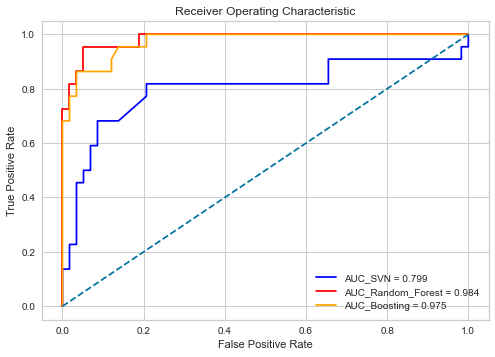

In [90]:
#3. Programar una función para presentar en una sola gráfica la curva ROC (Receiver Operating Characteristic)
#   haciendo uso de los modelos de Machine Learning SVM, Random Forest y Boosting. Presentar sus conclusiones. (4 puntos)

plt.title('Receiver Operating Characteristic')

plt.plot(false_positive_rate_SVN,true_positive_rate_SVN, color='blue',label = 'AUC_SVN = %0.3f' % roc_auc_SVN)

plt.plot(false_positive_rate_RF,true_positive_rate_RF, color='red',label = 'AUC_Random_Forest = %0.3f' % roc_auc_RF)

plt.plot(false_positive_rate_BOO,true_positive_rate_BOO, color='orange',label = 'AUC_Boosting = %0.3f' % roc_auc_BOO)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],linestyle='--')

plt.axis('tight')

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
# Concluciones
# El modelo random Forest resulta ser el mejor entre el resto por un margen corto al modelo Boosting